In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv('income.csv')

In [5]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
age               30000 non-null int64
sex               30000 non-null object
education         30000 non-null object
education-num     30000 non-null int64
marital-status    30000 non-null object
workclass         30000 non-null object
occupation        30000 non-null object
hours-per-week    30000 non-null int64
income            30000 non-null object
label             30000 non-null int64
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [7]:
df.describe()

,age,education-num,hours-per-week,label
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,37.144100,10.280133,41.384033,0.276667
std,12.856173,2.479556,9.684555,0.447358
min,18.000000,3.000000,20.000000,0.000000
25%,26.000000,9.000000,40.000000,0.000000
50%,36.000000,10.000000,40.000000,0.000000
75%,46.000000,13.000000,45.000000,1.000000
max,90.000000,16.000000,90.000000,1.000000


In [8]:
df['occupation'].nunique()

12

In [9]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp', 'Federal-gov', 'State-gov'],
      dtype=object)

In [10]:
df['education-num'].unique()

array([ 9, 14, 15,  7,  8,  3, 10, 13, 12,  5, 11,  6,  4, 16])

In [11]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [12]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [13]:
cat_cols = ['sex', 'education','marital-status','income','workclass','occupation']
cont_cols = ['age','hours-per-week']
label = ['label']

In [14]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [15]:
df = shuffle(df,random_state = 101)
df.reset_index(drop = True , inplace = True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


In [16]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [17]:
cat_szs

[2, 14, 6, 2, 5, 12]

In [18]:
embd_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [19]:
embd_szs

[(2, 1), (14, 7), (6, 3), (2, 1), (5, 3), (12, 6)]

In [20]:
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
mst = df['marital-status'].cat.codes.values
ic = df['income'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values

In [21]:
cats = np.stack([sx,ed,mst,ic,wc,oc],axis=1)

In [22]:
cats

array([[ 0, 10,  3,  0,  2,  6],
       [ 0, 12,  1,  1,  4,  7],
       [ 1, 13,  0,  0,  2,  0],
       ...,
       [ 1, 10,  1,  1,  2,  2],
       [ 0,  6,  3,  0,  2,  0],
       [ 1,  8,  5,  1,  3,  9]], dtype=int8)

In [23]:
cats = torch.tensor(cats,dtype= torch.int64)

In [24]:
cats

tensor([[ 0, 10,  3,  0,  2,  6],
        [ 0, 12,  1,  1,  4,  7],
        [ 1, 13,  0,  0,  2,  0],
        ...,
        [ 1, 10,  1,  1,  2,  2],
        [ 0,  6,  3,  0,  2,  0],
        [ 1,  8,  5,  1,  3,  9]])

In [25]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [26]:
conts

array([[23, 50],
       [37, 39],
       [34, 40],
       ...,
       [62, 45],
       [37, 40],
       [50, 65]])

In [27]:
conts = torch.tensor(conts,dtype= torch.float32)

In [28]:
conts.dtype

torch.float32

In [29]:
y = torch.tensor(df[label].values).flatten()

In [30]:
y 

tensor([0, 1, 0,  ..., 1, 0, 1])

In [31]:
batch_size = 30000
test_size = 5000

cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size:batch_size]
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]

y_train= y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [32]:
cat_train.shape

torch.Size([25000, 6])

In [33]:
cont_train.shape

torch.Size([25000, 2])

In [34]:
class Tabularmodel(nn.Module):
    
    def __init__(self,embd_szs,n_cont,out_sz,layers,p=0.5):
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embd_szs])
        self.embd_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
                                     
        layerlist = []
        
        n_embd = sum((nf for ni,nf in embd_szs))
        n_in = n_embd + n_cont
                                     
        
        for i in layers:
                layerlist.append(nn.Linear(n_in,i))
                layerlist.append(nn.ReLU(inplace=True))
                layerlist.append(nn.BatchNorm1d(i))
                layerlist.append(nn.Dropout(p))
                n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self,x_cat,x_cont):
            embeddings = []
            
            for i,e in enumerate(self.embeds):
                    embeddings.append(e(x_cat[:,i]))
            x = torch.cat(embeddings,1)
            x = self.embd_drop(x)
            
            x_cont = self.bn_cont(x_cont)
            x = torch.cat([x,x_cont],1)                       
            x = self.layers(x)
            
            return x
        

In [35]:
torch.manual_seed(33)

In [36]:
len(cont_cols)

2

In [37]:
conts.shape[1]

2

In [38]:
model = Tabularmodel(embd_szs,conts.shape[1],2,[50],p = 0.4)

In [39]:
model

Tabularmodel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(2, 1)
    (4): Embedding(5, 3)
    (5): Embedding(12, 6)
  )
  (embd_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=50, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [41]:
import time 
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(cat_train,cont_train)
    loss  = criterion(y_pred,y_train)
    losses.append(loss)
    
    if i%25 == 0:
        print(f'epoch {i} loss : {loss.item() : 4.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch {i:3} loss : {loss.item() : 4.8f}')
print(f'duration of training : {(time.time() - start_time)/60} minutes')

epoch 25 loss :  0.62122136
epoch 50 loss :  0.49718806
epoch 75 loss :  0.38460600
epoch 100 loss :  0.28409591
epoch 125 loss :  0.24179120
epoch 150 loss :  0.21204366
epoch 175 loss :  0.19817403
epoch 200 loss :  0.18343391
epoch 225 loss :  0.16326939
epoch 250 loss :  0.15110110
epoch 275 loss :  0.14326590
epoch 300 loss :  0.14208336
epoch 300 loss :  0.14208336
duration of training : 2.7770182967185972 minutes


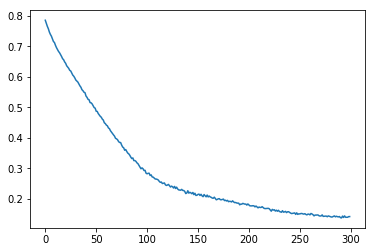

In [42]:
plt.plot(range(epochs),losses)

In [43]:
with torch.no_grad():
    
    y_val = model(cat_test,cont_test)
    loss = criterion(y_val,y_test)

print(f'CE losss is : {loss}')

CE losss is : 0.14629150927066803


In [46]:
correct = 0
for i in range(len(y_test)):
            if y_val[i].argmax().item() == y_test[i]:
               correct+=1
pct_coorect = 100 * (correct/len(y_test))
print(pct_coorect)

92.92
